In [1]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Xu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Xu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('reviews_cleaned.csv')
df.head()

,Company,Username,City,State,Date,Rating,Review,Distance,Cost,Cost.per.Mile,Sqft.Moved
0,Ryder,James W,Ocala,FL,2018-04-01,5,"I'd use them again, no problem.",48.0,142.0,2.96,NaN
1,Ryder,Jeanne M,Pittsburgh,PA,2017-11-02,5,they were fast and careful that nothing broke ...,25.0,1116.0,44.64,1000.0
2,Ryder,Dean G,Cary,NC,2017-04-21,4,"The truck was fine, but the training video bef...",NaN,NaN,NaN,NaN
3,Ryder,Michael A,Azusa,CA,2016-10-27,5,Great company!,NaN,NaN,NaN,NaN
4,Ryder,Tracy F,Rochester,NY,2016-01-19,5,First time using and would use again.,2400.0,2400.0,1.00,3000.0


In [3]:
df.dtypes

Company           object
Username          object
City              object
State             object
Date              object
Rating             int64
Review            object
Distance         float64
Cost             float64
Cost.per.Mile    float64
Sqft.Moved       float64
dtype: object

In [4]:
df = df[['Company', 'Rating', 'Review']]

In [5]:
df.sample(10)

,Company,Rating,Review
4783,U-Haul,5,Excellent job!! Great guys!
2951,U-Haul,5,"Easiness to pick up and deliver, and good pric..."
1286,Penske,5,Perfect size truck for our local move. First t...
4793,U-Haul,5,The came through with everything as promised.
927,Budget,3,Well we arrived at the pick-up location for th...
4525,U-Haul,5,"Used them based on past moves, easy access to ..."
4282,U-Haul,5,Superb.
3341,U-Haul,3,Everything was going well but when we unloaded...
1413,Penske,5,Truck was new and very clean inside; easy to d...
1427,Penske,3,Nothing spectacular.


In [6]:
df.head(5)

,Company,Rating,Review
0,Ryder,5,"I'd use them again, no problem."
1,Ryder,5,they were fast and careful that nothing broke ...
2,Ryder,4,"The truck was fine, but the training video bef..."
3,Ryder,5,Great company!
4,Ryder,5,First time using and would use again.


In [7]:
# Convert all the string to lower cases
df['Review'] = df['Review'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

# \S+ means anything that is not an empty space
df['Review'] = df['Review'].apply(lambda x: re.sub('http\S*', '', x))

# \s+ means all empty space (\n, \r, \t)
df['Review'] = df['Review'].apply(lambda x: re.sub('\s+', ' ', x))

# We don't want empty string in our text
df = df.loc[df['Review'] != '']

In [8]:
df.sample(10)

,Company,Rating,Review
3404,U-Haul,5,everything looked and ran great. uhaul was clean.
4688,U-Haul,5,great
2972,U-Haul,4,$50.00
1390,Penske,1,good truck and service
2608,U-Haul,5,outstanding job. very professional and expertl...
1206,Penske,5,the truck was in good condition and we were ab...
2646,U-Haul,4,the truck was clean and timely.
1488,Penske,4,sufficient.
958,Budget,4,overcharged for pads and handtruck compared to...
93,Budget,4,it was a little hassle picking up and dropping...


## Filtering

In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
# remove stopwords
df['Review'] = df['Review'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

In [11]:
# remove punctuation
df['Review'] = df['Review'].apply(lambda x: re.sub('[^\w\s]', '', x))

## Tokenization\*
## Stemming*

In [12]:
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()

In [13]:
# df['Review'] = df['Review'].apply(lambda x: ' '.join([stemmer.stem(x) for x in x.split()]))

## Lemmatization

In [12]:
from nltk import WordNetLemmatizer
lemztr = WordNetLemmatizer()

In [13]:
df['Review'] = df['Review'].apply(lambda x: ' '.join([lemztr.lemmatize(x) for x in x.split()]))

In [14]:
df.sample(10)

,Company,Rating,Review
513,Budget,5,pleased truck providedworked great
4122,U-Haul,1,inconvienced greatly pick location hour away l...
2684,U-Haul,5,easy rent return
3832,U-Haul,2,truck there even reservation
2812,U-Haul,5,always happy uhaul
735,Budget,3,picked truck blanket reserved line go another ...
4123,U-Haul,5,called truck ready
2969,U-Haul,5,used uhaul past one time unpleasant others so ...
1540,Penske,4,truck comfortable drive
4142,U-Haul,1,would never use again reserved 26 ft uhaul tru...


## Word Cloud

In [15]:
# from wordcloud import WordCloud
from wordcloud import WordCloud,STOPWORDS

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from PIL import Image
import numpy as np

In [74]:
mask = np.array(Image.open(r'E:\E-Documents\NYC_Data_Science_Academy\Project_2_WebScraping\mask4.png'))
mask_up = np.array(Image.open(r'E:\E-Documents\NYC_Data_Science_Academy\Project_2_WebScraping\mask_up.png'))
mask_down = np.array(Image.open(r'E:\E-Documents\NYC_Data_Science_Academy\Project_2_WebScraping\mask_down.png'))

In [18]:
wc = WordCloud(width = 1200, height = 800, 
               background_color = "white", max_words = 2000, mask = mask, colormap = 'Set1')

# generate word cloud
wc.generate(''.join(df['Review']))

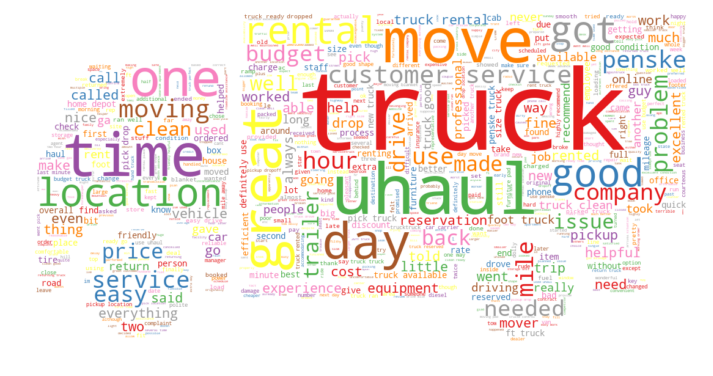

In [19]:
plt.figure(figsize=(12, 9))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [20]:
df.Company.unique()

array(['Ryder', 'Enterprise', 'Budget', 'Penske', 'U-Haul'], dtype=object)

In [76]:
# new_stopwords = ['truck', 'uhaul', 'penske', 'budget', 'penterprise', 'ryder']
# my_stopwords = stop + new_stopwords
# my_stopwords = stop
my_stopwords= ['truck', 'uhaul', 'penske', 'budget']

In [68]:
wc = WordCloud(width = 1200, height = 800, 
               background_color = "white", max_words = 2000, mask = mask, colormap = 'viridis',
               stopwords = my_stopwords)

# generate word cloud
wc.generate(''.join(df['Review']))

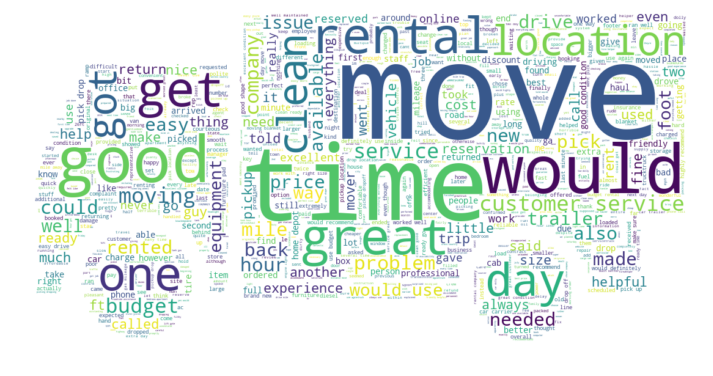

In [69]:
plt.figure(figsize=(12, 9))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [24]:
df_high = df.loc[df.Rating >= 4]
df_high.shape

(4189, 3)

In [25]:
wc = WordCloud(width = 1200, height = 800, 
               background_color = "white", max_words = 2000, mask = mask, colormap = 'cool', 
               stopwords = my_stopwords)

# generate word cloud
wc.generate(''.join(df_high['Review']))

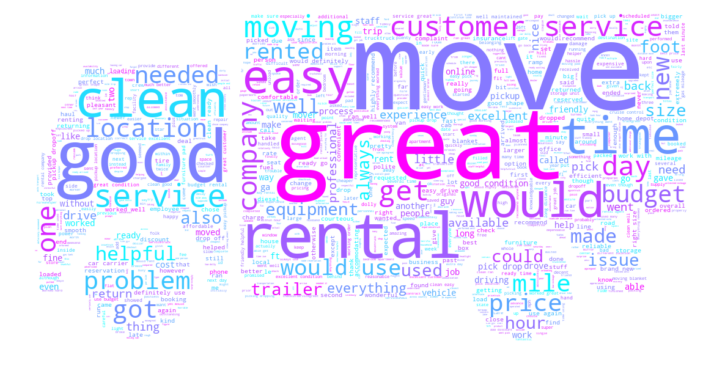

In [26]:
plt.figure(figsize=(12, 9))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [27]:
df_low = df.loc[df.Rating < 4]
df_low.shape

(1008, 3)

In [28]:
wc = WordCloud(width = 1200, height = 800, 
               background_color = "white", max_words = 2000, mask = mask, colormap = 'plasma', 
               stopwords = my_stopwords)

# generate word cloud
wc.generate(''.join(df_low['Review']))

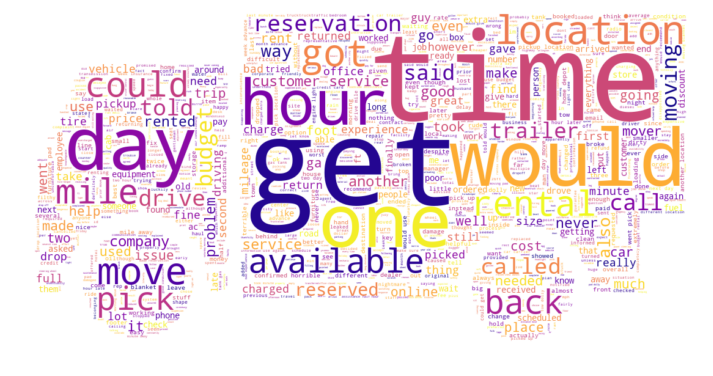

In [29]:
plt.figure(figsize=(12, 9))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [72]:
df.sample(5)

,Company,Rating,Review
3996,U-Haul,5,good job
4161,U-Haul,4,size truck requested anywhere houston 17 go si...
8,Ryder,5,ryder truck great truck ordered
962,Budget,1,budget arlington horrible vendor ive ever deal...
2200,Penske,2,use penske again problem truck took half hour ...


# U-Haul

In [73]:
df_uhaul = df[df['Company'] == 'U-Haul']
df_uhaul_up = df_uhaul[df_uhaul['Rating'] >= 4]
df_uhaul_down = df_uhaul[df_uhaul['Rating'] < 4]

In [77]:
wc = WordCloud(width = 1200, height = 800, 
               background_color = "white", max_words = 2000, mask = mask, colormap = 'Set1', 
               stopwords = my_stopwords)

# generate word cloud
wc.generate(''.join(df_uhaul['Review']))

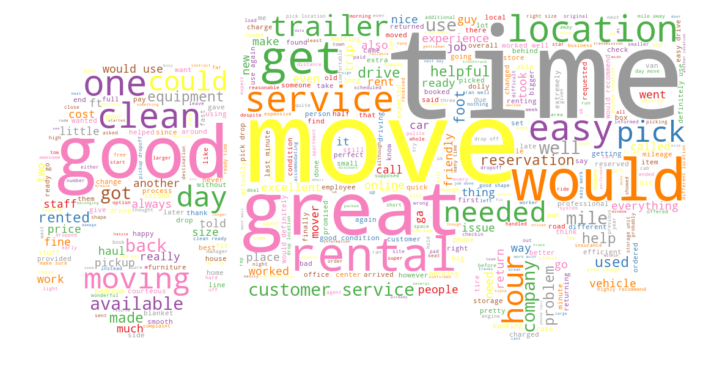

In [78]:
plt.figure(figsize=(12, 9))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [79]:
wc = WordCloud(width = 1200, height = 800, 
               background_color = "white", max_words = 2000, mask = mask_up, colormap = 'cool', 
               stopwords = my_stopwords)

# generate word cloud
wc.generate(''.join(df_uhaul_up['Review']))

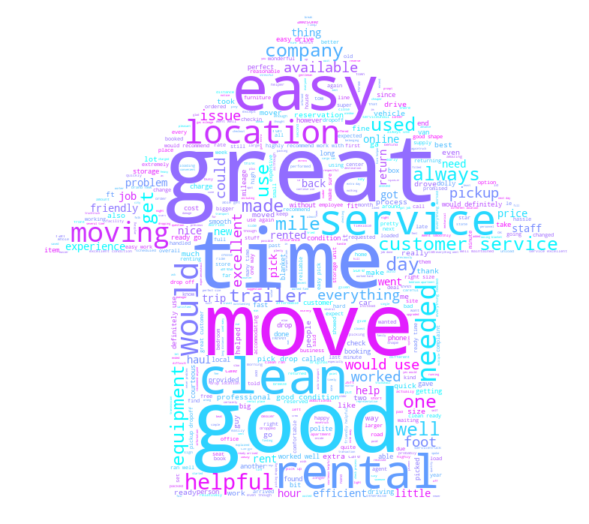

In [80]:
plt.figure(figsize=(12, 9))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [81]:
wc = WordCloud(width = 1200, height = 800, 
               background_color = "white", max_words = 2000, mask = mask_down, colormap = 'plasma', 
               stopwords = my_stopwords)

# generate word cloud
wc.generate(''.join(df_uhaul_down['Review']))

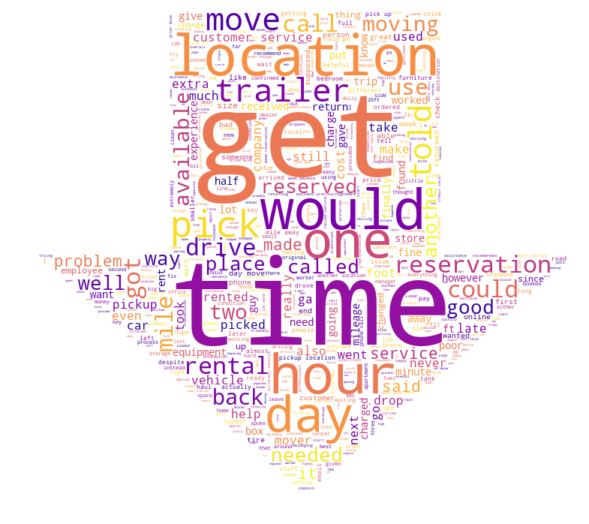

In [82]:
plt.figure(figsize=(12, 9))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

# Penske

In [83]:
df_penske = df[df['Company'] == 'Penske']
df_penske_up = df_penske[df_penske['Rating'] >= 4]
df_penske_down = df_penske[df_penske['Rating'] < 4]

In [84]:
wc = WordCloud(width = 1200, height = 800, 
               background_color = "white", max_words = 2000, mask = mask, colormap = 'Set1', 
               stopwords = my_stopwords)

# generate word cloud
wc.generate(''.join(df_penske['Review']))

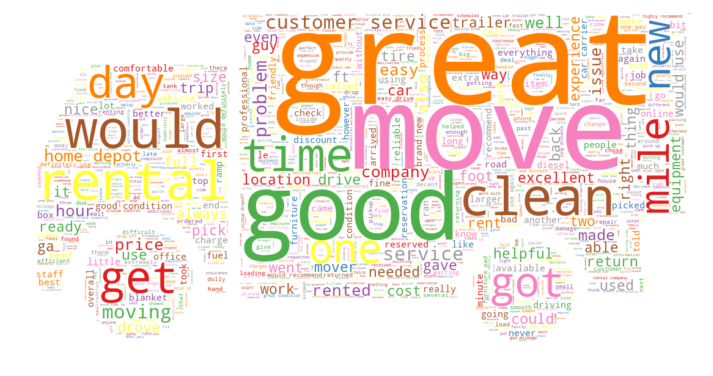

In [85]:
plt.figure(figsize=(12, 9))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [86]:
wc = WordCloud(width = 1200, height = 800, 
               background_color = "white", max_words = 2000, mask = mask_up, colormap = 'cool', 
               stopwords = my_stopwords)

# generate word cloud
wc.generate(''.join(df_penske_up['Review']))

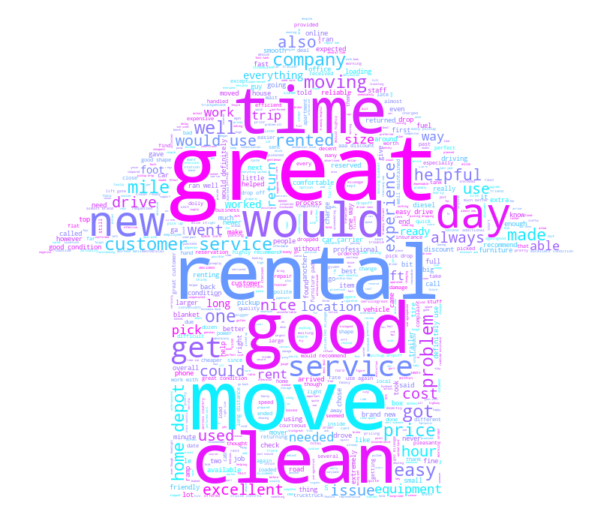

In [87]:
plt.figure(figsize=(12, 9))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [88]:
wc = WordCloud(width = 1200, height = 800, 
               background_color = "white", max_words = 2000, mask = mask_down, colormap = 'plasma', 
               stopwords = my_stopwords)

# generate word cloud
wc.generate(''.join(df_penske_down['Review']))

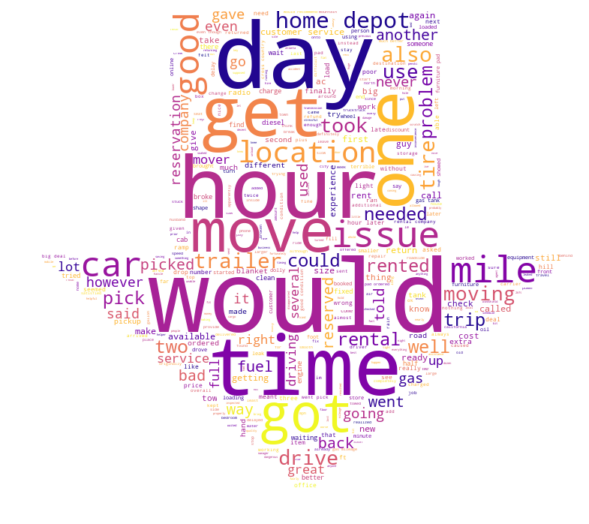

In [89]:
plt.figure(figsize=(12, 9))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

# Budget

In [90]:
df_budget = df[df['Company'] == 'Budget']
df_budget_up = df_budget[df_budget['Rating'] >= 4]
df_budget_down = df_budget[df_budget['Rating'] < 4]

In [91]:
wc = WordCloud(width = 1200, height = 800, 
               background_color = "white", max_words = 2000, mask = mask, colormap = 'Set1', 
               stopwords = my_stopwords)

# generate word cloud
wc.generate(''.join(df_budget['Review']))

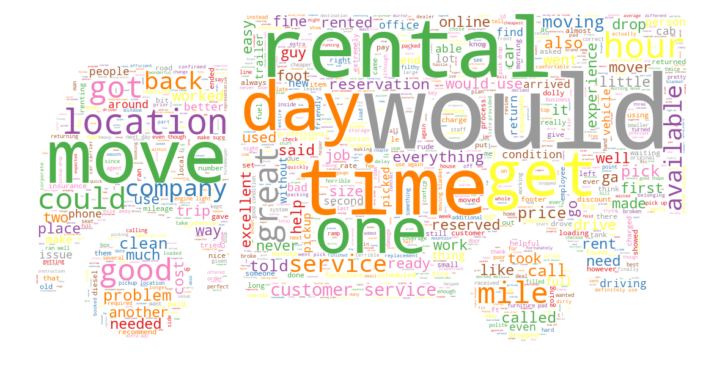

In [92]:
plt.figure(figsize=(12, 9))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [93]:
wc = WordCloud(width = 1200, height = 800, 
               background_color = "white", max_words = 2000, mask = mask_up, colormap = 'cool', 
               stopwords = my_stopwords)

# generate word cloud
wc.generate(''.join(df_budget_up['Review']))

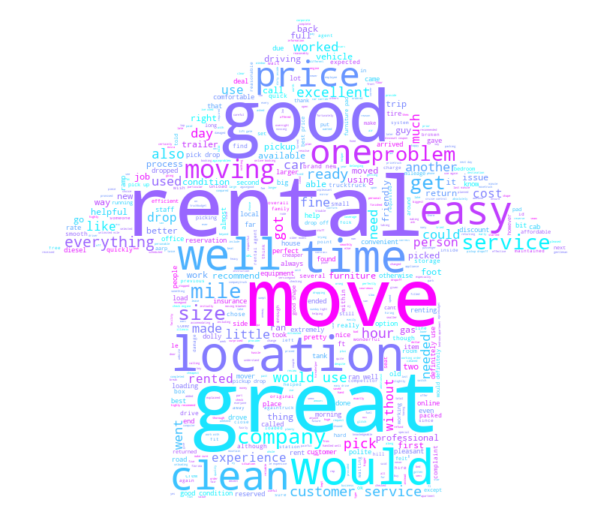

In [94]:
plt.figure(figsize=(12, 9))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [95]:
wc = WordCloud(width = 1200, height = 800, 
               background_color = "white", max_words = 2000, mask = mask_down, colormap = 'plasma', 
               stopwords = my_stopwords)

# generate word cloud
wc.generate(''.join(df_budget_down['Review']))

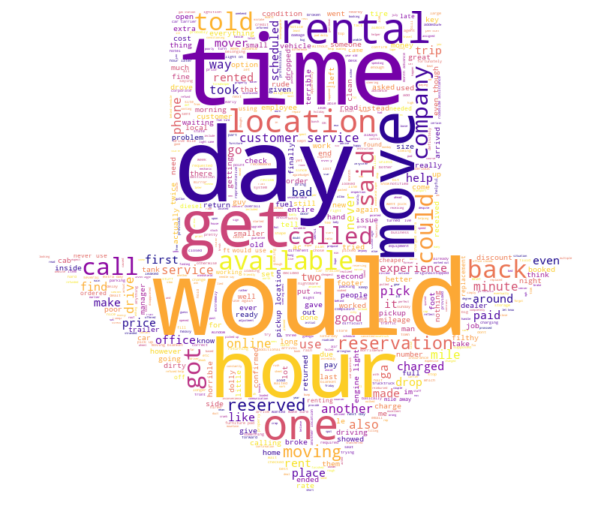

In [96]:
plt.figure(figsize=(12, 9))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

## Sentiment Analysis

In [30]:
from textblob import TextBlob

In [31]:
df.shape

(5197, 3)

In [32]:
sample_size = 5197

def sentiment_func(x):
    sentiment = TextBlob(x['Review'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = df.sample(sample_size).apply(sentiment_func, axis = 1)

In [33]:
sample.head(5)

,Company,Rating,Review,polarity,subjectivity
1940,Penske,1,first truck filthy beat old second truck littl...,-0.158750,0.538333
3094,U-Haul,5,experience good different uhaul location le he...,0.282143,0.390306
1866,Penske,2,told phone rep several time size storage unit ...,-0.102041,0.485714
5155,U-Haul,5,great,0.800000,0.750000
1025,Budget,4,friendly staff good price,0.537500,0.550000


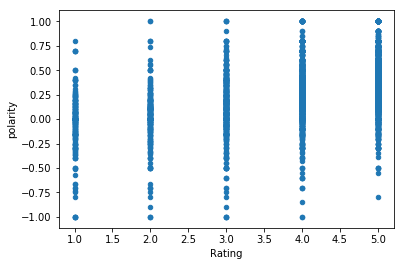

In [34]:
sample.plot.scatter('Rating', 'polarity')

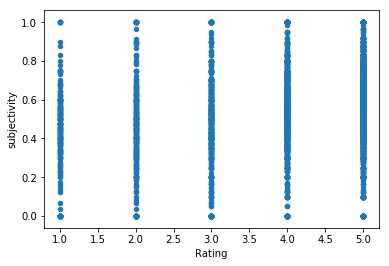

In [35]:
sample.plot.scatter('Rating', 'subjectivity')

In [36]:
import seaborn as sns

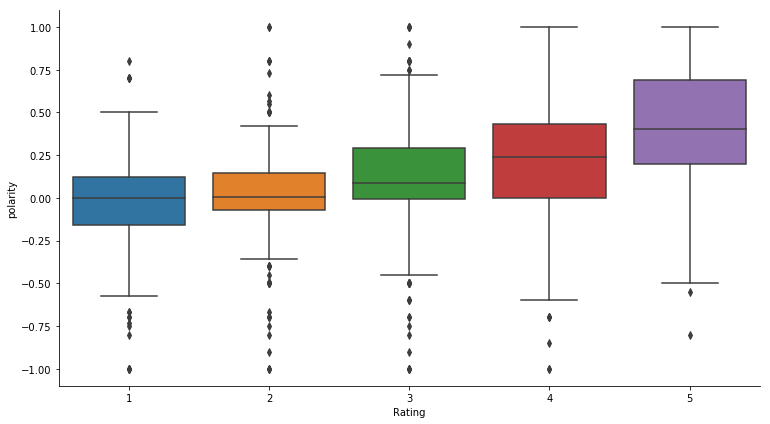

In [42]:
sns.factorplot(kind = 'box', x = 'Rating', y = 'polarity', data = sample, size = 6, aspect = 1.8)

## Co-Occurrence Probabilities

In [43]:
# Step 1: Get a list of words and their frequencies.
df.shape

(5197, 3)

In [44]:
df.head(2)

,Company,Rating,Review
0,Ryder,5,id use again problem
1,Ryder,5,fast careful nothing broke recommend highly


In [45]:
df.tail(2)

,Company,Rating,Review
5195,U-Haul,3,leaky truck box got wet
5196,U-Haul,5,jim helped u everything pod rental trailer ren...


In [46]:
df.iloc[0, 2].split()

['id', 'use', 'again', 'problem']

In [47]:
words_bag = []
for i in range(5197):
    words_bag += df.iloc[i, 2].split()

words_bag[:30]

['id',
 'use',
 'again',
 'problem',
 'fast',
 'careful',
 'nothing',
 'broke',
 'recommend',
 'highly',
 'truck',
 'fine',
 'training',
 'video',
 'beforehand',
 'little',
 'much',
 'would',
 'probably',
 'go',
 'uhaul',
 'next',
 'time',
 'save',
 'time',
 'spent',
 'rental',
 'location',
 'great',
 'company']

In [48]:
N = len(words_bag)
print(N)
words = []
totals = {}
for i in range(1, N-1):
    w = words_bag[i]
    if w not in words:
        words.append(w)
        totals[w] = 0
    totals[w] = totals[w] + 1

76375


In [51]:
# Step 3: Get co-occurrence counts.
def get_counts(window_size = 2):
    counts = {}
    for w0 in vocab_words:
        counts[w0] = {}
    for i in range(window_size, N - window_size):
        w0 = words_bag[i]
        if w0 in vocab_words:
            for j in (list(range(-window_size,0)) + list(range(1,window_size+1))):
                w = words_bag[i+j]
                if w in context_words:
                    if w not in counts[w0].keys():
                        counts[w0][w] = 1
                    else:
                        counts[w0][w] = counts[w0][w] + 1
    return counts

In [52]:
def get_co_occurrence_dictionary(counts):
    probs = {}
    for w0 in counts.keys():
        sum = 0
        for w in counts[w0].keys():
            sum = sum + counts[w0][w]
        if sum > 0:
            probs[w0] = {}
            for w in counts[w0].keys():
                probs[w0][w] = float(counts[w0][w])/float(sum)
    return probs

In [53]:
def get_context_word_distribution(counts):
    counts_context = {}
    sum_context = 0
    context_frequency = {}
    for w in context_words:
        counts_context[w] = 0
    for w0 in counts.keys():
        for w in counts[w0].keys():
            counts_context[w] = counts_context[w] + counts[w0][w]
            sum_context = sum_context + counts[w0][w]
    for w in context_words:
        context_frequency[w] = float(counts_context[w])/float(sum_context)
    return context_frequency

In [49]:
# Step 2: Decide on the vocabulary. 
vocab_words = [w for w in words if totals[w] > 5]
context_words = [w for w in words if totals[w] > 25]

In [50]:
len(vocab_words), len(context_words)

(1454, 531)

## Word Embedding

In [54]:
import numpy as np

In [55]:
print("Computing counts and distributions")
counts = get_counts(2)
probs = get_co_occurrence_dictionary(counts)
context_frequency = get_context_word_distribution(counts)
#
print("Computing pointwise mutual information")
n_vocab = len(vocab_words)
n_context = len(context_words)
pmi = np.zeros((n_vocab, n_context))
for i in range(0, n_vocab):
    w0 = vocab_words[i]
    for w in probs[w0].keys():
        j = context_words.index(w)
        pmi[i,j] = max(0.0, np.log(probs[w0][w]) - np.log(context_frequency[w]))

Computing counts and distributions
Computing pointwise mutual information


In [56]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA(n_components=100)
vecs = pca.fit_transform(pmi)
for i in range(0,n_vocab):
    vecs[i] = vecs[i]/np.linalg.norm(vecs[i])

In [58]:
import pickle

In [59]:
fd = open("embedding.pickle", "wb")
pickle.dump(vocab_words, fd)
pickle.dump(context_words, fd)
pickle.dump(vecs, fd)
fd.close()

In [60]:
def word_NN(w):
    if not(w in vocab_words):
        print("Unknown word")
        return
    v = vecs[vocab_words.index(w)]
    neighbor = 0
    curr_dist = np.linalg.norm(v - vecs[0])
    for i in range(1, n_vocab):
        dist = np.linalg.norm(v - vecs[i])
        if (dist < curr_dist) and (dist > 0.0):
            neighbor = i
            curr_dist = dist
    return vocab_words[neighbor]

In [61]:
word_NN('truck'), word_NN('move'), word_NN('uhaul'), word_NN('great')

('26', 'moved', 'penske', 'good')

In [64]:
word_NN('locate'), word_NN('service'), word_NN('rental'), word_NN('easy')

('extend', 'customer', 'drop', 'quick')

In [63]:
word_NN('get'), word_NN('day'), word_NN('time'), word_NN('would')

('someone', 'late', 'several', 'recommend')

In [70]:
word_NN('clean'), word_NN('drive'), word_NN('got'), word_NN('issue')

('ran', 'driving', 'one', 'problem')

In [71]:
word_NN('charge'), word_NN('cost'), word_NN('reservation'), word_NN('tire')

('additional', 'mileage', 'confirmed', 'repair')

In [99]:
word_NN('phone'), word_NN('deal'), word_NN('price'), word_NN('job')

('call', 'with', 'best', 'wonderful')